In [26]:
# Standard
import os
import sys
from pathlib import Path #representing filesystem paths with semantics appropriate

# Extra
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Custom `DatasetLoader`class for easier loading and subsetting data from the datasets.
module_path = os.path.abspath(os.path.join(".."))  # supposed to be parent folder
if module_path not in sys.path:
    sys.path.append(module_path)
from src.utility.dataset_loader_hdf5 import DatasetLoader

In [4]:
# Various Settings
TABLE_NAME = "sensors_100hz"  # Table with raw sensor data
SEED = 712  # Used for every random function
HMOG_HDF5 = Path.cwd().parent / "data" / "processed" / "hmog_dataset.hdf5"
EXCLUDE_COLS = ["sys_time"]

In [5]:
hmog = DatasetLoader(
    hdf5_file=HMOG_HDF5,
    table_name=TABLE_NAME,
    max_subjects=[],
    task_types=[],
    exclude_subjects=[],
    exclude_cols=[],
    seed=SEED,
)

hmog.data_summary()

,DataFrame,Memory (MB),Rows,Columns,Subjects,Sessions
0,all,13239.87,123955466,13,100,2392
1,index,0.09,2392,4,100,2392


In [18]:
hmog.all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123955466 entries, 0 to 30717
Data columns (total 13 columns):
acc_x        float64
acc_y        float64
acc_z        float64
gyr_x        float64
gyr_y        float64
gyr_z        float64
mag_x        float64
mag_y        float64
mag_z        float64
sys_time     int64
subject      object
session      object
task_type    int64
dtypes: float64(9), int64(2), object(2)
memory usage: 12.9+ GB


In [19]:
# Cast subjects to categorical for plotting & memory saving
hmog.all["subject"] = hmog.all["subject"].astype("category")

In [21]:
np.random.seed(SEED)
session = np.random.choice(hmog.all["session"].unique())
session

'240168_session_6'

In [22]:
df_single_session = hmog.all[hmog.all["session"] == session].copy()
df_single_session["Session Time"] = pd.to_datetime(df_single_session['sys_time'], unit='ms')
df_single_session = df_single_session.set_index("Session Time")
df_single_session.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,sys_time,subject,session,task_type
Session Time,,,,,,,,,,,,,
2014-05-07 01:12:17.760,-1.077391,5.659893,6.297947,-0.024740,-0.158825,-0.398284,2.544333,-12.447667,-25.970667,1399425137760,240168,240168_session_6,3
2014-05-07 01:12:17.770,-0.994139,5.666150,6.324555,-0.029016,-0.173180,-0.390496,2.688165,-12.677330,-26.023833,1399425137770,240168,240168_session_6,3
2014-05-07 01:12:17.780,-0.910885,5.672408,6.351164,-0.033292,-0.187536,-0.382707,2.832000,-12.907000,-26.077000,1399425137780,240168,240168_session_6,3
2014-05-07 01:12:17.790,-0.827631,5.678666,6.377773,-0.030543,-0.205556,-0.383318,2.832000,-12.907000,-26.077000,1399425137790,240168,240168_session_6,3
2014-05-07 01:12:17.800,-0.744379,5.684923,6.404380,-0.016188,-0.236710,-0.383318,2.389000,-12.907000,-26.077000,1399425137800,240168,240168_session_6,3


In [23]:
print("Session duration according to timestamps:")
df_single_session.index.max() - df_single_session.index.min()

Session duration according to timestamps:


Timedelta('0 days 00:10:51.980000')

In [24]:
print(f"Task Type: {int(df_single_session.task_type.unique()[0])}")
print("where\n[1, 3, 5] are sitting \n[2, 4, 6] are walking")

Task Type: 3
where
[1, 3, 5] are sitting 
[2, 4, 6] are walking


NameError: name 'utils_save_plot' is not defined

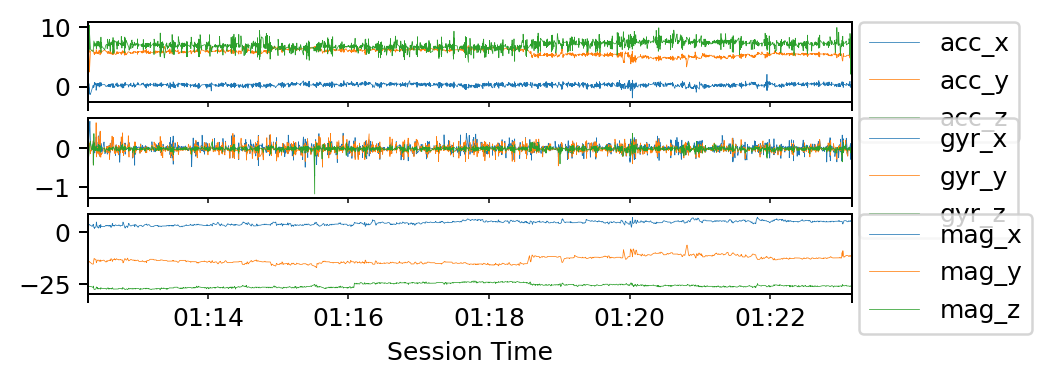

In [27]:
plot_rows = [
    ["acc_x", "acc_y", "acc_z"],
    ["gyr_x", "gyr_y", "gyr_z"],
    ["mag_x", "mag_y", "mag_z"],
]

f, axes = plt.subplots(3, 1, dpi=180, figsize=(5.473, 2))
for i, row in enumerate(plot_rows):
    g = df_single_session[row].plot(linewidth=0.3, ax=axes[i], sharex="col")
    g.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

utils_save_plot(plt, REPORT_PATH / "buech2019-hmog-session-sample.png")